# Medical Cost Personal Insurance Project
Project Goal: The goal of this project is to develop a predictive model that accurately estimates health insurance costs for individuals based on a set of input features including age, gender, body mass index (BMI), number of dependents, smoking status, and residential region in the United States. The primary objective is to create a robust and reliable algorithm that can assist individuals, insurance companies, and healthcare providers in predicting insurance costs with a high degree of accuracy.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset

df= pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Variables in Dataset:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Observation :

we can see there are 1338 rows and 7 columns in the dataset.

Among 7 column, one column 'charges' is our target variable, remaining 6 columns are independent variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations:

We can see in the dataset there are 3 types of datatype are present in the dataset which are integar, float & object

We have 2 columns holding integar value, 2 columns contain float values and rest 3 columns has object values.


### Missing Data

In [8]:
#Checking for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

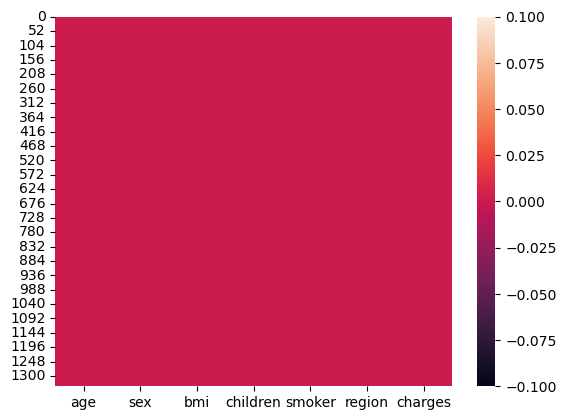

In [9]:
#lets visualise it
sns.heatmap(df.isnull())

In [10]:
#Checking duplicate values
df.duplicated().sum()

1

In [11]:
#dropping duplicated Values
df.drop_duplicates(inplace=True)

#checking Duplicated Values again
df.duplicated().sum()

0

In [12]:
#checking dimension of data after removing duplicate values
df.shape

(1337, 7)

Observation :

1 duplicated values found in the dataset, so we have droped the duplicated row.

Now our dataframe contains 1337 rows and 7 columns


In [13]:
df.nunique().to_frame("No. of Unique Values in Each column")

,No. of Unique Values in Each column
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [14]:
#checking unique values in target Column
df["charges"].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

### Column Types:

In [15]:
num_colmn = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns in our dataset :\n", num_colmn,"\n")

cat_column = df.select_dtypes(include=['object']).columns
print("categorical columns in our dataset :\n", cat_column)

Numerical columns in our dataset :
 Index(['age', 'bmi', 'children', 'charges'], dtype='object') 

categorical columns in our dataset :
 Index(['sex', 'smoker', 'region'], dtype='object')


In [16]:
#description of data in categorical columns:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Observation:

'age' column does not appear to be significantly skewed. It is approximately symmetric or very close to being normally distributed.

mean of 'BMI' (30.66) is somewhat closer to the 75th percentile (34.70) than the 25th percentile (26.29). This suggests a slightly right-skewed distribution, where the tail of the distribution extends more to the right.

mean number of 'children'(1.10) is closer to the 75th percentile (2.00) than the 25th percentile (0.00). This also indicates a right-skewed distribution, where more individuals have a higher number of dependents.

In [17]:
#description of data in categorical columns:
df.describe(include=['object'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


### Lets visualize the distribution of data in thecolumns

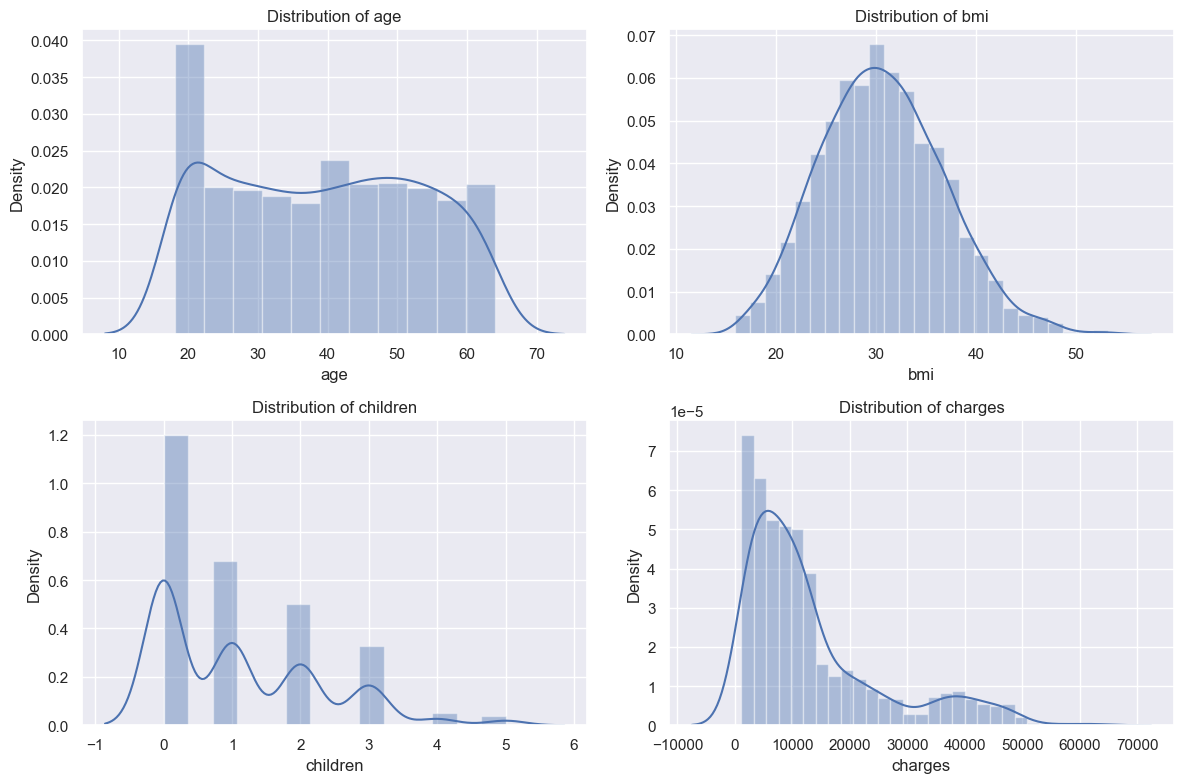

In [18]:
# Numerical Columns
plt.figure(figsize=(12, 8))
p=1
for column in num_colmn:
    sns.set()
    # Adjust the subplot size within the figure
    plt.subplot(2,2,p)
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    p += 1
plt.tight_layout()
plt.show()

Observations :

Age: As we know we have 47 unique values in our dataset and Maximum people are in age between 20-25

BMI : Normal BMi is ideally 18.5 to 24.9 however, in our dataset we can see maximum occurances in between 24.9 to 35 approx

Children: In out dataset Maximum number of people don't have children. We can visualize that data is showing skewness. However, we wont remove it at is belongs to categorical data

Charges : It is our target column, it contains 1337 unique values, and maximum people are getting 1000-17000

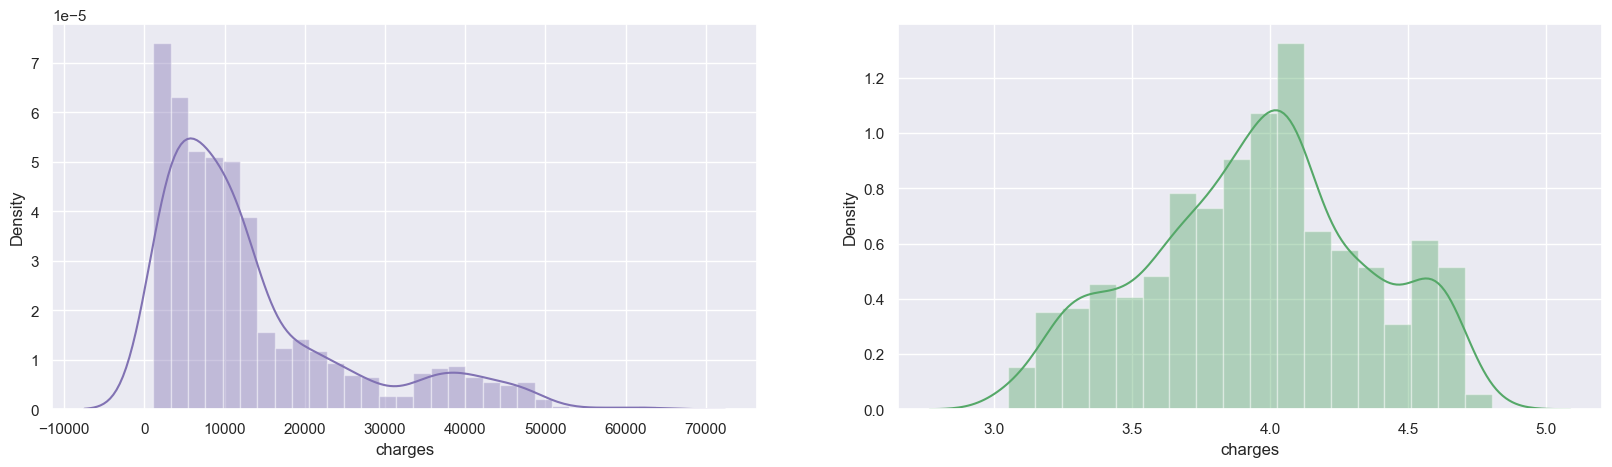

In [19]:
#Handling Distribution of Charges

# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color = 'm')

# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color = 'g')
plt.show()

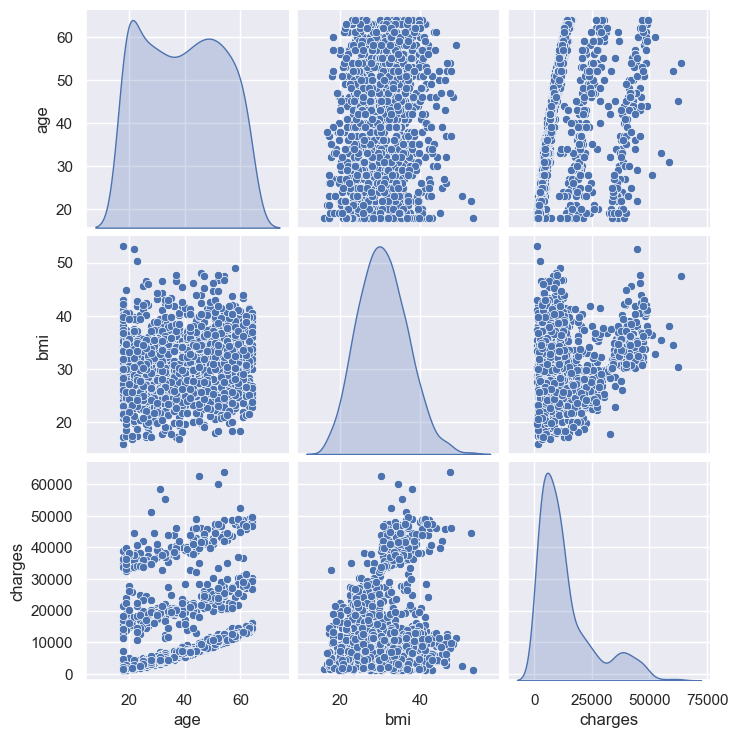

In [20]:
# Pairplot for Age, BMI, Charges
numerical_df = df[num_colmn]

# Remove the 'children' column from numerical_df
numerical_df.drop('children', axis=1, inplace=True)

sns.pairplot(numerical_df, diag_kind = 'kde')
plt.show()

Observations: The pairplot indicates the presence of a linear relationship between age and BMI with respect to charges.

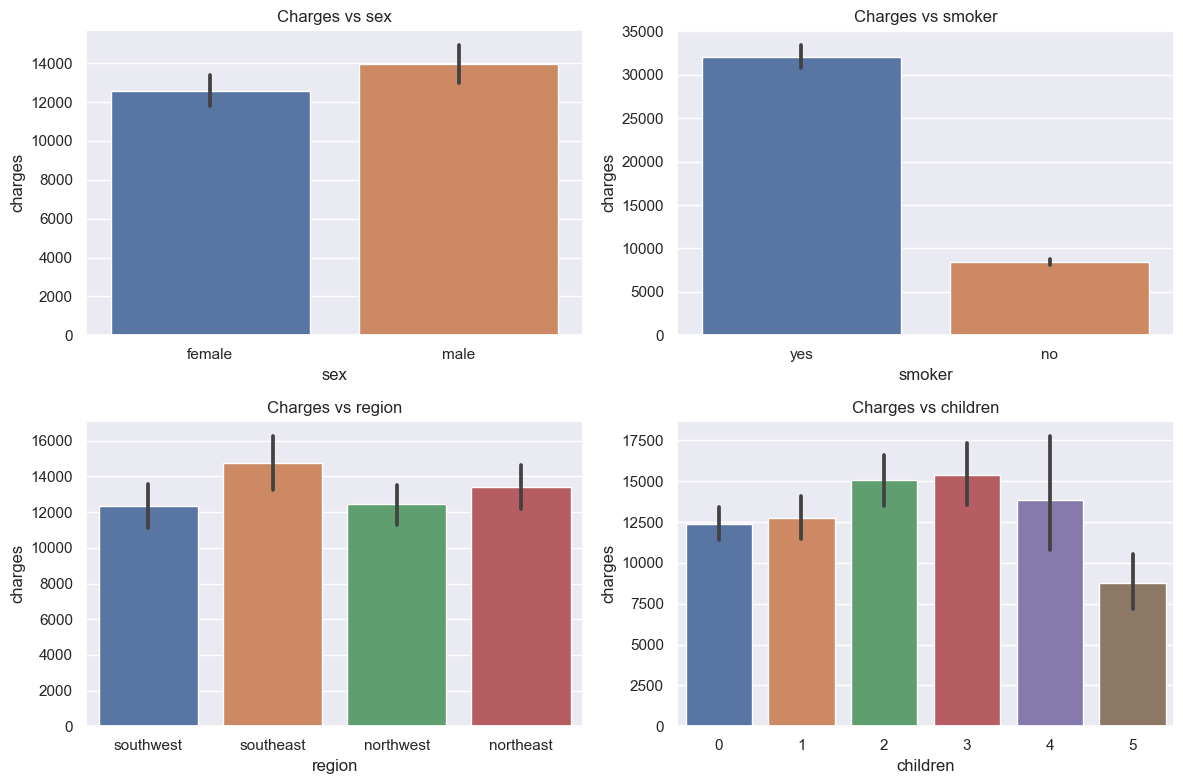

In [21]:
#Adding children variable in categorical column
cat_column = cat_column.append(pd.Index(['children']))

#Create a DataFrame containing the selected categorical columns
cat_df = df[cat_column]

p = 1
plt.figure(figsize=(12, 8))

for column in cat_df:
    sns.set()
    if p <= 4:
        plt.subplot(2, 2, p)
        sns.barplot(x=column, y='charges', data=df)
        plt.title(f'Charges vs {column}')
        p += 1

plt.tight_layout()
plt.show()

Observations :

Sex: The data is bit baised towards male than women in the dataset.

Smoker: Ration of smoker is higher than non smoker in our dataset.And we can clearly visualise smokers medical charges is higher than non smokers.

Region: We can notice southeast region are paying higher than other 3 regions.

Children: Here cam see people with 2 and 3 children than the people with 0,1,4 and 5 respectively.

For a deeper understanding, let's explore how the combination of factors collectively impacts medical charges.

### Bivariate Analysis

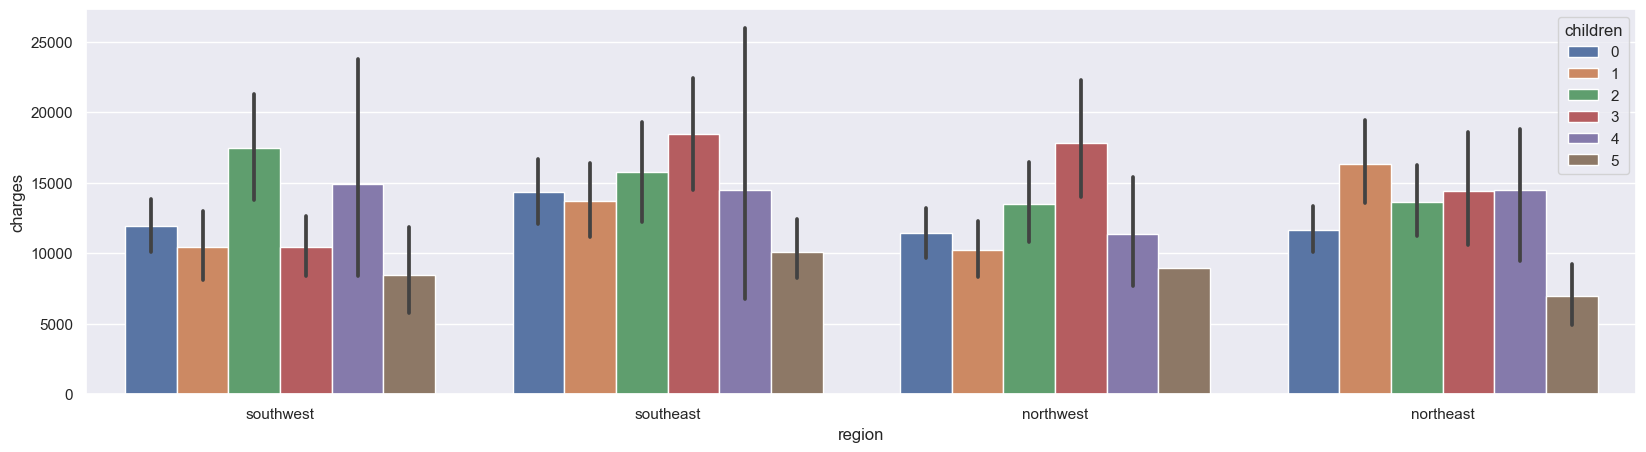

In [22]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

Observations :

It appears that there is no statistically significant difference in how the number of children in a specific region impacts medical charges.

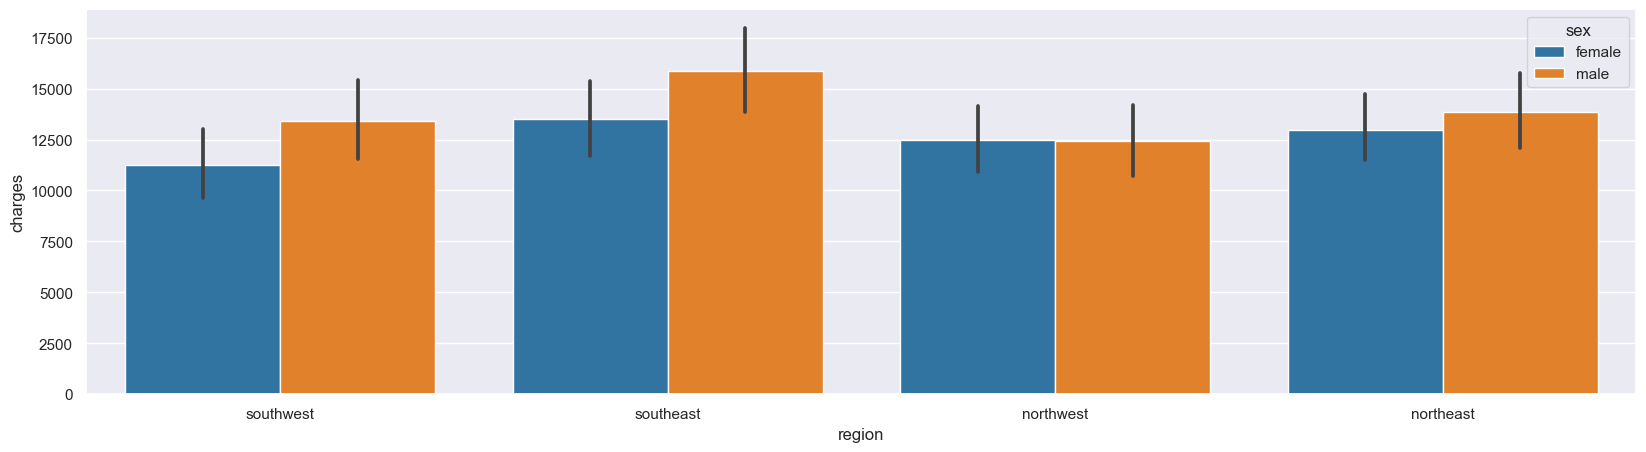

In [23]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'tab10')
plt.show()

Observations :

Once again, similar to the previous graph, there doesn't appear to be a statistically significant difference in how gender within a specific region affects medical charges.

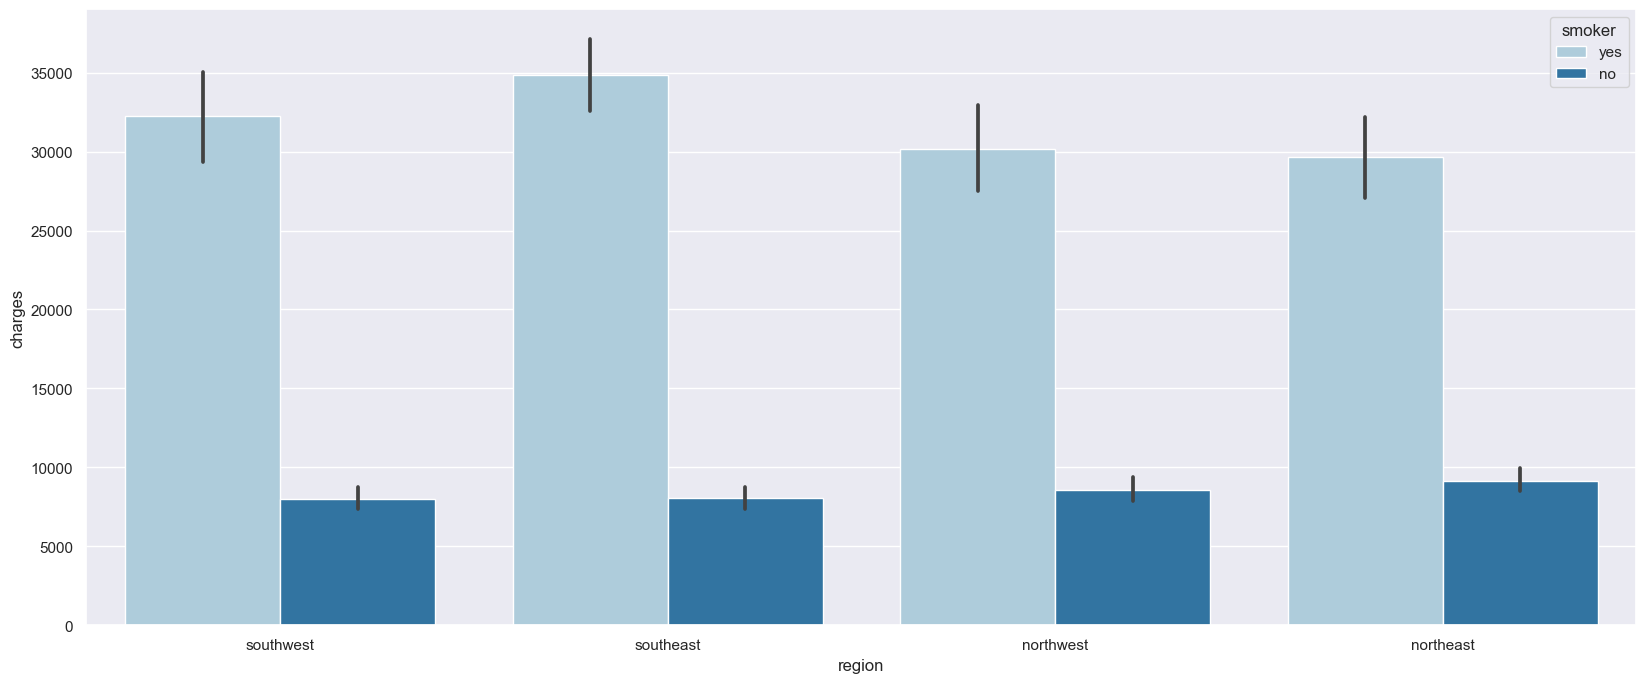

In [24]:
plt.subplots(1, 1, figsize = (20, 8))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Paired')
plt.show()

Observations: In contrast to the other factors, it appears that there is a statistically significant difference in how smoking behavior within a region impacts medical charges.

From these bar charts, it is evident that smoking behavior by region significantly affects medical charges. Now, let's examine the correlation between non-categorical variables (age, BMI, and children) and medical charges, considering smoking behavior as a factor.

Text(0.5, 1.0, 'Number of children vs Medical Charges')

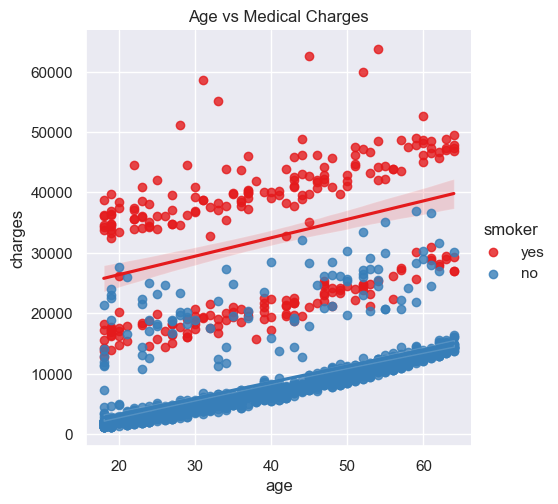

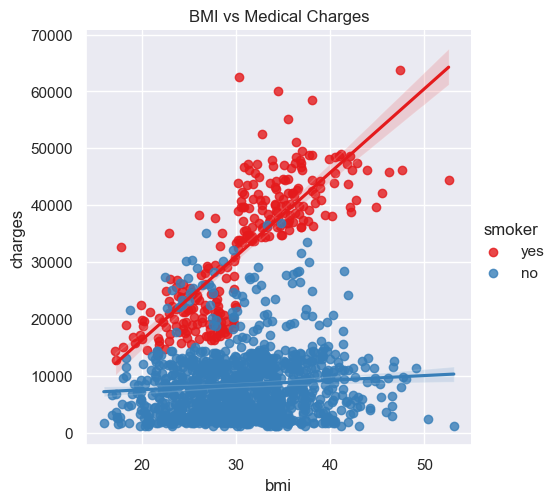

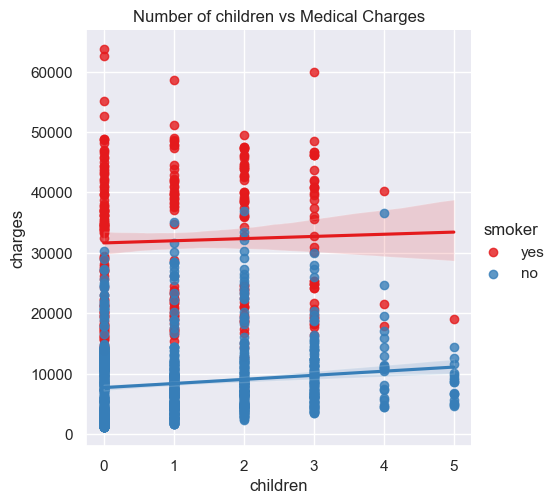

In [25]:
#Charges by age, bmi, and children based on smoking behavior

ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Observations: Based on the analysis, it's clear that smoking has a significant impact on medical costs. 
    When combined with other factors such as age, BMI, and the number of children, 
    the effect of smoking on medical costs becomes even more pronounced and leads to higher medical expenses. 
    In other words, smoking, when considered alongside these factors, contributes to increased medical costs.

## Encoding the categorical features

In [26]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region)
df.region = label.transform(df.region)

label.fit(df.sex)
df.sex = label.transform(df.sex)

label.fit(df.smoker)
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Multivariate Analysis

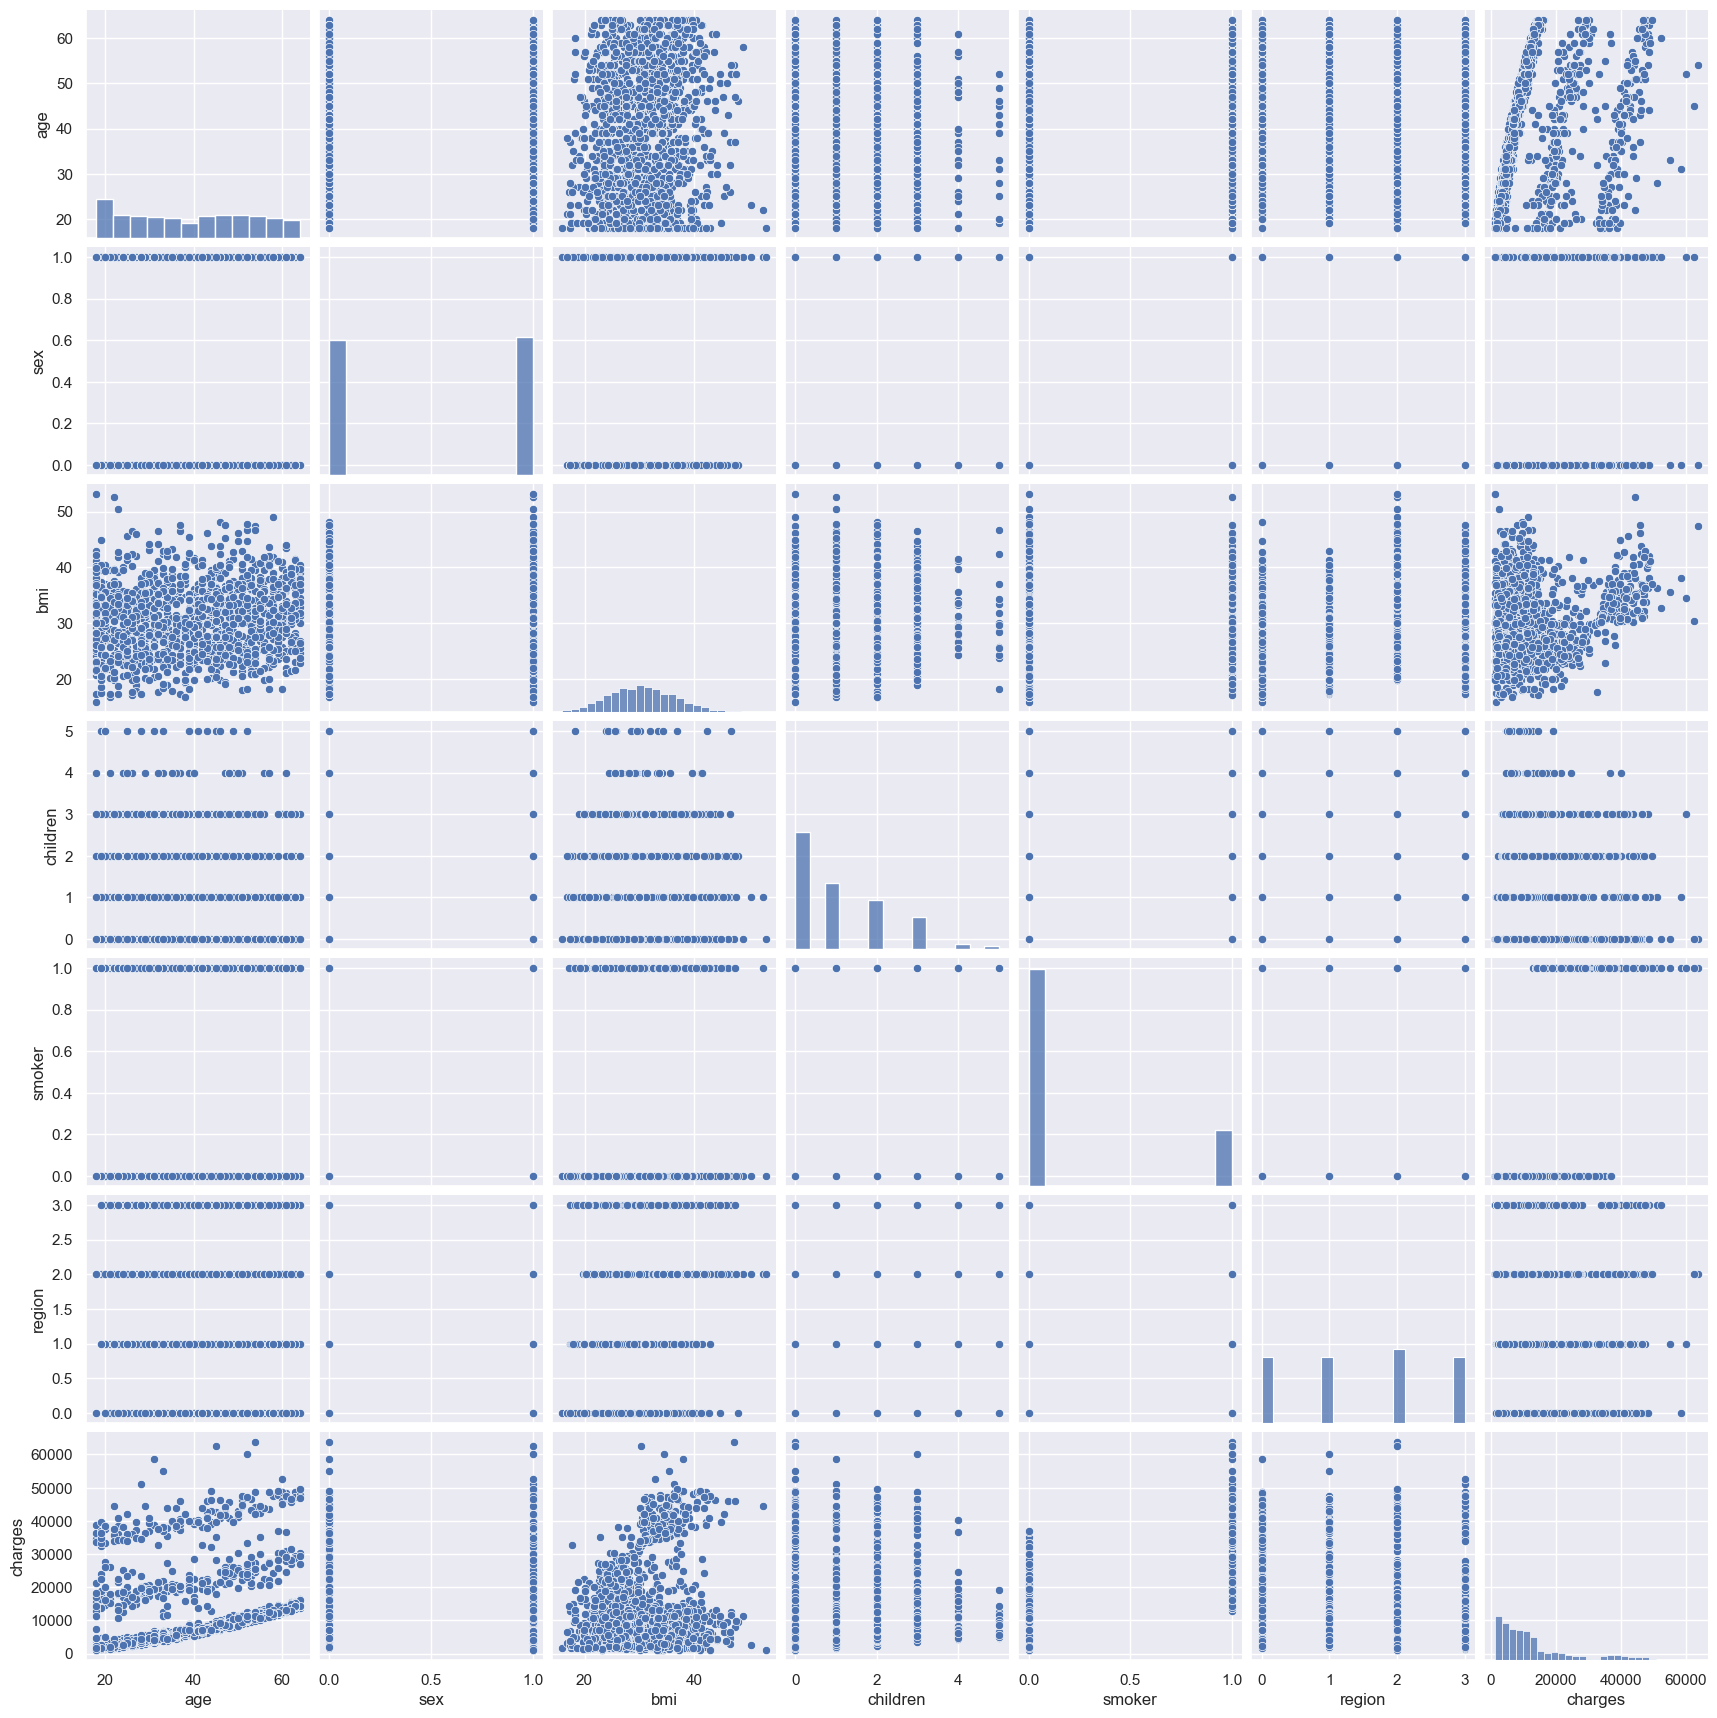

In [28]:
sns.pairplot(df, palette ='hot_r')
plt.show()


In [29]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


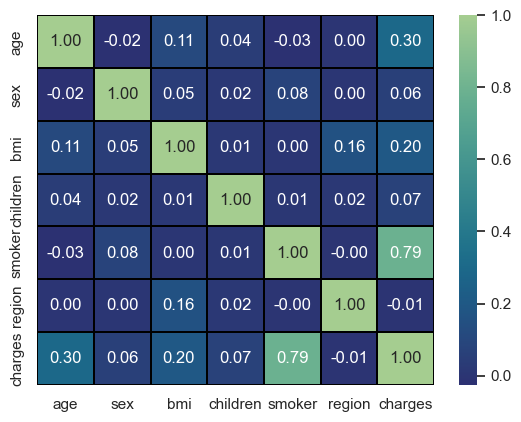

In [30]:
sns.heatmap(df.corr(),annot=True, fmt='0.2f',linewidth=0.2, linecolor='black',cmap="crest_r")
plt.show()

In [31]:
df.corr().charges.sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

### Visualizing the correlation between label & features using bar plot

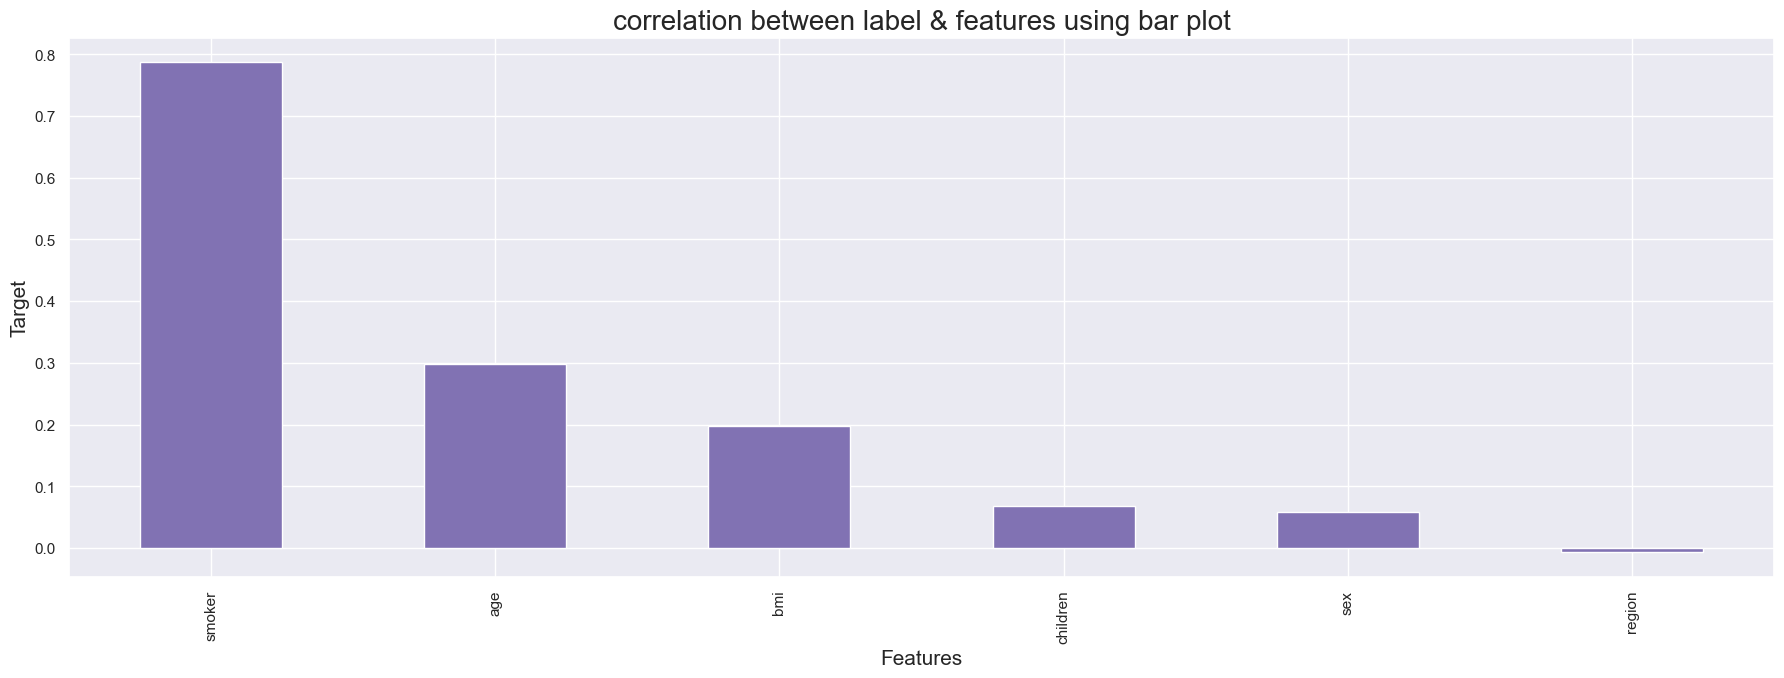

In [32]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('correlation between label & features using bar plot', fontsize=20)
plt.show()

Observation : From the above barplot we can notice the positive correlationship between the features and the target. Here 'smoker' is positive correlation with our target , gradually it decrease to age than bmi and child, than sex and less correlation with region.

### Separating Features & Labels

In [33]:
#separating independent and target variables into x and y
x=df.drop('charges', axis=1)
y=df['charges']

print("Feature Dimension ", x.shape)
print("Label Dimension", y.shape)

Feature Dimension  (1337, 6)
Label Dimension (1337,)


In [34]:
#finding the best random state

#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [35]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maimum r2 score is ', maxAccu, "Random_State ",maxRS)

Maimum r2 score is  0.809575162037627 Random_State  11


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state=maxRS)

In [37]:
print("x_train :", x_train.shape)
print("x_test :", x_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

x_train : (1002, 6)
x_test : (335, 6)
y_train : (1002,)
y_test : (335,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [40]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_LR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score:  0.809575162037627
R2 on training Data:  73.14466579170873
Mean Absolute Error:  3758.946360838597
Mean Squared Error:  25834546.641032394
Root Mean Squared Error:  5082.769583704577


In [41]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_RFR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score:  0.871567473121421
R2 on training Data:  97.35520551813931
Mean Absolute Error:  2418.12674638592
Mean Squared Error:  17424177.126126345
Root Mean Squared Error:  4174.227728110476


In [42]:
KNN= KNN()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
pred_train=KNN.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_KNN))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_KNN))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_KNN))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2 Score:  0.1082367965286255
R2 on training Data:  40.762357520748694
Mean Absolute Error:  7828.773399776121
Mean Squared Error:  120983682.1675014
Root Mean Squared Error:  10999.258255332557


In [43]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_GBR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score:  0.9021119726679765
R2 on training Data:  89.6512123733554
Mean Absolute Error:  2231.998710617618
Mean Squared Error:  13280267.609877199
Root Mean Squared Error:  3644.2101489729157


In [44]:
lasso= Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_lasso))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score:  0.8095755153106238
R2 on training Data:  73.14465723752146
Mean Absolute Error:  3759.389643549798
Mean Squared Error:  25834498.71321053
Root Mean Squared Error:  5082.764868967532


In [45]:
ridge= Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_ridge))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score:  0.8091990653200131
R2 on training Data:  73.1424268938584
Mean Absolute Error:  3772.727488533633
Mean Squared Error:  25885570.910222825
Root Mean Squared Error:  5087.786445029196


In [46]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_train=DTR.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_DTR))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score:  0.6634986868381036
R2 on training Data:  99.87795868900035
Mean Absolute Error:  3043.334055907463
Mean Squared Error:  45652441.99586728
Root Mean Squared Error:  6756.659085366619


In [47]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_svr))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score:  -0.0558537065410194
R2 on training Data:  -10.663314922990551
Mean Absolute Error:  7897.660732821093
Mean Squared Error:  143245503.68335247
Root Mean Squared Error:  11968.521365789196


In [48]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 Score: ', r2_score(y_test,pred_etr))
print('R2 on training Data: ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error: ', mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score:  0.8652635686809256
R2 on training Data:  99.87795868900035
Mean Absolute Error:  2227.290496570448
Mean Squared Error:  18279414.893590126
Root Mean Squared Error:  4275.443239430285


### Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score

In [53]:
score =cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_LR)-score.mean())*100)

[0.76123487 0.70840689 0.77720769 0.73365562 0.7551376 ]
0.7471285330088384
Difference between R2 Score & Cross Validation Score:  6.244662902878861


In [51]:
score =cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_RFR)-score.mean())*100)

[0.85081072 0.77467445 0.86652381 0.8243813  0.85253164]
0.8337843842599886
Difference between R2 Score & Cross Validation Score:  3.7783088861432446


In [54]:
score =cross_val_score(KNN,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_KNN)-score.mean())*100)

[0.14668553 0.03658099 0.03172295 0.13957399 0.16316057]
0.10354480529055962
Difference between R2 Score & Cross Validation Score:  0.4691991238065879


In [55]:
score =cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_GBR)-score.mean())*100)


[0.87426874 0.79955842 0.89381432 0.85063832 0.86052967]
0.8557618962658188
Difference between R2 Score & Cross Validation Score:  4.635007640215772


In [56]:
score =cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_lasso)-score.mean())*100)

[0.76125678 0.70843568 0.77718717 0.73366564 0.7551367 ]
0.7471363933595828
Difference between R2 Score & Cross Validation Score:  6.2439121951040955


In [57]:
score =cross_val_score(ridge,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_ridge)-score.mean())*100)

[0.76139416 0.70872916 0.77656529 0.7340199  0.75488218]
0.7471181375337136
Difference between R2 Score & Cross Validation Score:  6.208092778629948


In [58]:
score =cross_val_score(DTR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_DTR)-score.mean())*100)

[0.7731011  0.66905727 0.71556352 0.72164034 0.68027277]
0.71192700158251
Difference between R2 Score & Cross Validation Score:  -4.842831474440635


In [59]:
score =cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_svr)-score.mean())*100)

[-0.11521827 -0.10975599 -0.08194453 -0.10398097 -0.10781598]
-0.10374314816465749
Difference between R2 Score & Cross Validation Score:  4.788944162363809


In [61]:
score =cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score & Cross Validation Score: ", (r2_score(y_test, pred_etr)-score.mean())*100)

[0.8342806  0.74026792 0.85277824 0.80976002 0.84170914]
0.8157591809638278
Difference between R2 Score & Cross Validation Score:  4.950438771709775


Observation: From the difference of both R2 & Cross validation score computed on R2 score we can conclude that Gradient Boosting Regressor is our best fitting & best performing model

## Saving The best model

In [62]:
import pickle
filename ="Medical_cost_insurance.pkl"
pickle.dump(GBR, open(filename, 'wb'))

In [63]:
#loading Model
load_model=pickle.load(open('Medical_cost_insurance.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

90.21119726679765


In [64]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,332,333,334
Predicted,35631.827377,5997.99314,8205.048588,5952.071914,10005.733549,12387.810493,6132.968415,15481.729105,14951.704759,14353.015517,...,5728.329701,18350.487824,6808.705132,3042.068478,49797.771082,10966.124074,17677.989345,8102.143473,7122.723895,7676.634711
Original,36397.576000,4415.15880,7639.417450,2304.002200,9563.029000,11454.021500,5012.471000,12648.703400,13462.520000,13974.455550,...,12404.879100,19444.265800,5385.337900,1880.070000,46661.442400,3481.868000,13405.390300,7077.189400,3537.703000,5708.867000
